# The FACSPy dataset: Gate Handling

This vignette explains how to handle analysis of different populations.

In cytometry, different populations are defined. These can be classically cell types, but also heterogeneities within on specific cell population.

In order to allow for comparative analysis of different cell populations, it is essential to keep them side-by-side in one dataset.

FACSPy allows for this, by assigning each analysis a 'gate' and a 'layer' parameter, where 'gate' refers to the user-defined cell population and 'layer' defines the underlying data (e.g. compensated or transformed data).

## A quick overview:

1) Gates have to be provided to analysis and visualization functions.  
2) The gate names can be accessed via the `.uns['gating_cols']` slot.  
3) Gates can be passed by their population name, a partial gating path and a full gating path.  
4) Set default gates and default layers using the `fp.settings.default_gate` and `fp.settings.default_layer` properties.  
5) Define gate-aliases for gate paths using `fp.settings.add_new_alias`.  

In [1]:
import FACSPy as fp

import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)
warnings.filterwarnings(
    action='ignore',
    category=UserWarning
)

In [2]:
dataset = fp.read_dataset(input_dir = "../Tutorials/spectral_dataset/",
                          file_name = "raw_dataset")
dataset

AnnData object with n_obs × n_vars = 3103969 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

## Access available gates

In order to extract the gate names, we access the `.uns['gating_cols']` slot.

In [3]:
dataset.uns["gating_cols"]

Index(['root/all_cells', 'root/all_cells/FSC_singlets',
       'root/all_cells/FSC_singlets/live',
       'root/all_cells/FSC_singlets/live/CD45+',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/NK',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/T',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/T/CD8+T'],
      dtype='object')

## Pass a specific gate to the function

Gates can be accessed by either their full name or by the last defined population.

That means that, in this example, CD45+ cells can be either passed using `gate="CD45+"` or `gate="root/all_cells/FSC_singlets/live/CD45+"`.

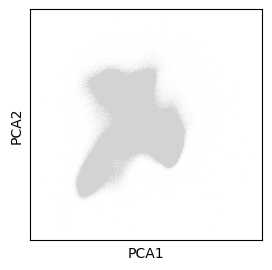

In [4]:
fp.tl.pca(dataset, gate = "CD45+", layer = "transformed")
fp.pl.pca(dataset, gate = "CD45+", layer = "transformed")

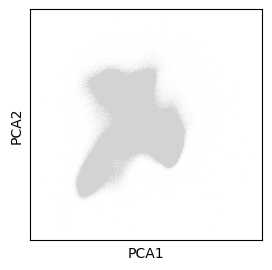

In [5]:
fp.tl.pca(dataset, gate = "root/all_cells/FSC_singlets/live/CD45+", layer = "transformed")
fp.pl.pca(dataset, gate = "root/all_cells/FSC_singlets/live/CD45+", layer = "transformed")

Note that if there is amibiguity, for example if two gates end with the same population (e.g. ../T_cells/CCR3+ and ../T_cells/CD4+/CCR3+), a `GateAmbiguityError` is raised.

It is then necessary to remove the ambiguity by passing a partial gate path.

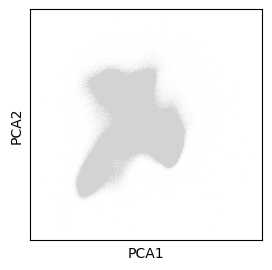

In [6]:
fp.tl.pca(dataset, gate = "live/CD45+", layer = "transformed")
fp.pl.pca(dataset, gate = "live/CD45+", layer = "transformed")

## Set default gates and default layers

In order to simplify this process, default gates and default layers can be defined using the `FACSPy.settings`.

After setting the defaults, the `gate` and `layer` parameter are automatically inserted from the settings and do not have to be passed explicitly.

However, if you wish to analyze a different gate, passing the gate parameter explicitly will always override the defaults set.

In [7]:
fp.settings.default_gate = "CD45+"
fp.settings.default_layer = "transformed"

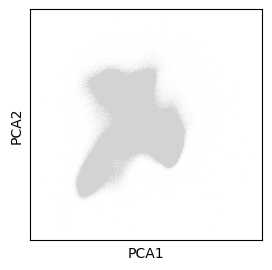

In [8]:
fp.tl.pca(dataset)
fp.pl.pca(dataset)

## Add gate aliases

Gate paths can be aliased using the `fp.add_new_alias()` functionality and can be passed by their alias to the functions.

Note that we override the default settings by passing a gate explicitly.

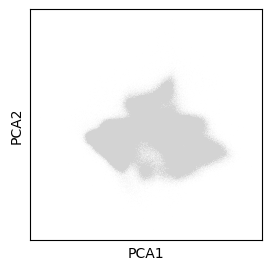

In [9]:
fp.settings.add_new_alias("root/all_cells/FSC_singlets/live/CD45+/PBMC", "favorite")

fp.tl.pca(dataset, gate = "favorite")
fp.pl.pca(dataset, gate = "favorite")

This gate alias can also be used to define a default gate.

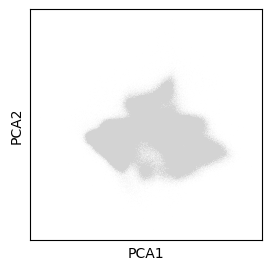

In [10]:
fp.settings.default_gate = "favorite"

fp.tl.pca(dataset)
fp.pl.pca(dataset)